In [2]:
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt # for displaying graphs
from IPython.display import clear_output

In [3]:
file_train_X = np.loadtxt(fname = "trainX.txt")
file_train_Y = np.loadtxt(fname = "trainY.txt")
file_test_X = np.loadtxt(fname = "testX.txt")
file_test_Y= np.loadtxt(fname = "testY.txt")

In [4]:
print(file_train_X.shape)
total_participants= file_train_X.shape[0]
half_row_Train_X=int (total_participants/2)

(500, 256)


In [5]:
# First half Y value is two
two_train=(file_train_X[:(half_row_Train_X),:])

In [6]:
# Proability of two wrt one and zero
two_one_prob=two_train.sum(axis=0)/two_train.shape[0]
two_zero_prob=1-two_one_prob

In [7]:
# second half Y value is four
four_train=(file_train_X[half_row_Train_X:total_participants,:])

In [8]:
# Proability of four wrt one and zero
four_one_prob=four_train.sum(axis=0)/four_train.shape[0]
four_zero_prob=1-four_one_prob

In [9]:
print(file_test_X.shape)

(100, 256)


two prob : 0.0
four prob : 9.138955860665083e-41
It is four


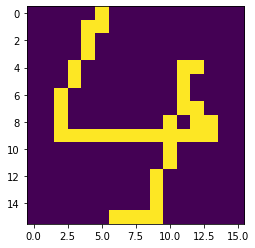

In [10]:
# Taking any row index value of test data
TP=FP=TN=FN=0
var=0
for value in range (0,100):
    img=(file_test_X[value,])
    output=int(file_test_Y[value])
     #print(img)
    
    # calculating probabilty wrt to two
    prob_two_mul=1
    index=0
    for each in img:
        if(each==0):
            prob_two_mul=prob_two_mul*(two_zero_prob[index])
        elif(each==1):
            prob_two_mul=prob_two_mul*two_one_prob[index]
        index+=1
    print("two prob :",prob_two_mul)
            
    # calculating probabilty wrt to four

    prob_four_mul=1
    index=0
    for each in img:
        if(each==0):
             prob_four_mul=prob_four_mul*(four_zero_prob[index])
        elif(each==1):
            prob_four_mul=prob_four_mul*four_one_prob[index]
        index+=1
    print("four prob :",prob_four_mul)
    
    # image resize
    img5=np.reshape(img,(16,16),order='F')
    img5.shape
    
    # show image
    plt.imshow(img5)

    if(prob_two_mul>prob_four_mul):
        print("It is two") 
        var=2
    elif(prob_two_mul<prob_four_mul):
        print("It is four")
        var=4
    else:
        print("It is may be two or four")
        
    # finding accuracy
    if(var==output and var==2):
        TP+=1
    if(var==output and var==4):
        TN+=1
    if(output==4):
        if(var==2):
            FP+=1
    if(output==2):
        if(var==4):
            FN+=1
    
    plt.pause(0.001)
    
    #inp=input("Press '1' to exit or press [enter] to continue for next participant: ")
    #if(inp=='1'):
    #    break
    #else:
    clear_output(wait=True)

In [11]:
Accuracy = (TP+TN)/(TP+TN+FN+FP)
print(Accuracy)

1.0


In [12]:
Recall=TP/(TP+FN)
print(Recall)

1.0


In [13]:
Precision=TP/(TP+FP)
print(Precision)

1.0
